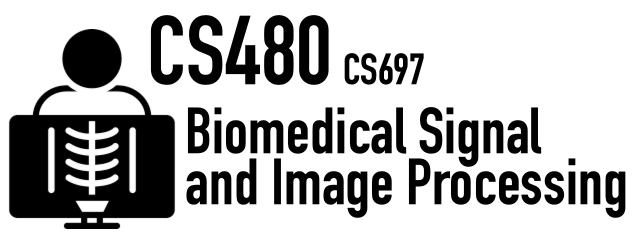


# Assignment 5

**Yiming Shen**

**4/03/2021**

**HW Topic: load CT volume, slice it, adjust window/level**

In [1]:
# In this assignment, we will visualize and explore a CT scan!

In [2]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# we are using pydicom, so lets install it!
!pip install pydicom

In [4]:
import numpy as np
import mahotas as mh
import os
from sklearn.ensemble import RandomForestClassifier

## **Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [5]:
# Please download https://cs480.org/data/ct.zip and extract it on your computer!
# This is a CT scan of an arm in DICOM format.

#### 1) Let's explore the data without loading it.
TODO: Without loading the data, how many slices are there?

TODO: YOUR_ANSWER

There are **220** items.

![p1](https://github.com/Yiming-S/cs480student/blob/main/05/1.png?raw=true)

In [6]:
# 2) Let's visualize the data with SliceDrop! 
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [7]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click.

![p2](https://github.com/Yiming-S/cs480student/blob/main/05/2.png?raw=true)

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [8]:
# TODO: Please upload ct.zip using the file panel on the left.
# Then use the following snippet to extract the data.

In [9]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:zip_ref.extractall('.')


In [10]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [11]:
from pydicom import dcmread

In [12]:
# TODO: YOUR CODE FOR LOADING THE VOLUME AS A 3D NUMPY ARRAY
dirfiles = sorted(os.listdir('ct'))
file0 = dcmread('ct/{}'.format(dirfiles[0]))
imshape =  list(file0.pixel_array.shape)
imshape

[454, 512]

In [13]:
imshape.append(len(dirfiles))
data = np.empty(imshape)
data

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [14]:
for idx, entry in enumerate(dirfiles):
  arr = dcmread('ct/{}'.format(entry)).pixel_array
  data[:,:,idx] = arr

In [15]:
data

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [16]:
shape(data)

(454, 512, 220)

In [17]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.
ps = file0.PixelSpacing
st = file0.SliceThickness

In [18]:
ps

[0.619141, 0.619141]

In [19]:
st

"3.0"

In [20]:
imshape[2]//2

110

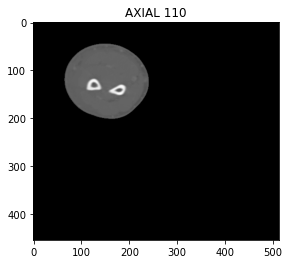

In [21]:
# TODO: YOUR CODE FOR AXIAL
AXIAL = ps[1]/ps[0]
plt.imshow(data[:, :, imshape[2]//2], cmap='gray')#110
plt.gca().set_aspect(AXIAL)
plt.title("AXIAL 110")
plt.show()

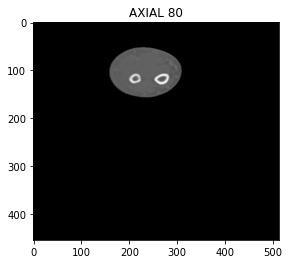

In [22]:
# TODO: YOUR CODE FOR AXIAL
AXIAL = ps[1]/ps[0]
plt.imshow(data[:, :, 80], cmap='gray')#80
plt.gca().set_aspect(AXIAL)
plt.title("AXIAL 80")
plt.show()

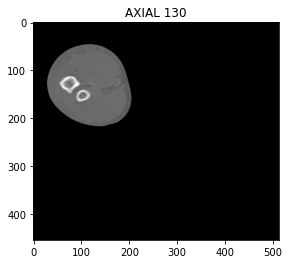

In [23]:
# TODO: YOUR CODE FOR AXIAL
AXIAL = ps[1]/ps[0]
plt.imshow(data[:, :, 130], cmap='gray')#130
plt.gca().set_aspect(AXIAL)
plt.title("AXIAL 130")
plt.show()

In [24]:
imshape[1]//3

170

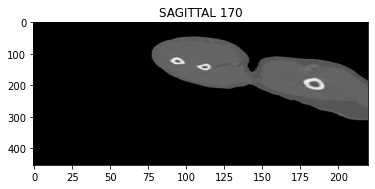

In [25]:
# TODO: YOUR CODE FOR SAGITTAL
SAGITTAL = ps[1]/st
plt.imshow(data[:,imshape[1]//3,:], cmap='gray')#170
plt.gca().set_aspect(SAGITTAL)
plt.title("SAGITTAL 170")
plt.show()

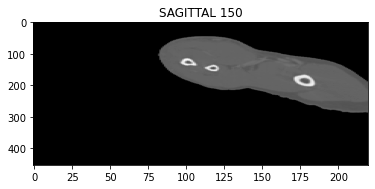

In [26]:
# TODO: YOUR CODE FOR SAGITTAL
SAGITTAL = ps[1]/st
plt.imshow(data[:,150,:], cmap='gray')#150
plt.gca().set_aspect(SAGITTAL)
plt.title("SAGITTAL 150")
plt.show()

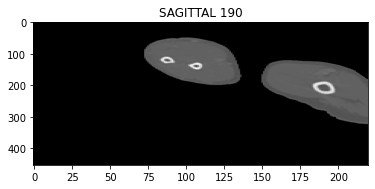

In [27]:
# TODO: YOUR CODE FOR SAGITTAL
SAGITTAL = ps[1]/st
plt.imshow(data[:,190,:], cmap='gray') #190
plt.gca().set_aspect(SAGITTAL)
plt.title("SAGITTAL 190")
plt.show()

In [28]:
imshape[0]//5

90

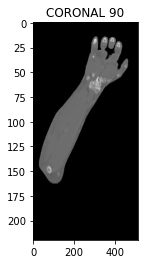

In [29]:
# TODO: YOUR CODE FOR CORONAL
CORONAL = st/ps[0]
plt.imshow(data[imshape[0]//5,:,:].T, cmap='gray')#90
plt.gca().set_aspect(CORONAL)
plt.title("CORONAL 90")
plt.show()

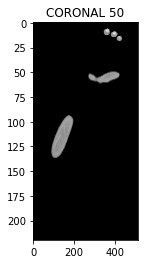

In [30]:
# TODO: YOUR CODE FOR CORONAL
CORONAL = st/ps[0]
plt.imshow(data[50,:,:].T, cmap='gray') #50
plt.gca().set_aspect(CORONAL)
plt.title("CORONAL 50")
plt.show()

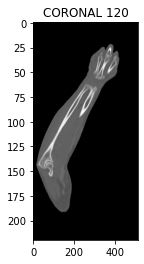

In [31]:
# TODO: YOUR CODE FOR CORONAL
CORONAL = st/ps[0]
plt.imshow(data[120,:,:].T, cmap='gray') #120
plt.gca().set_aspect(CORONAL)
plt.title("CORONAL 120")
plt.show()

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [32]:
# We will now enhance the visualization from above by performing 
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [33]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center 
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

In [34]:
# TODO: YOUR CODE
wc = file0.WindowCenter
ww = file0.WindowWidth
ri = file0.RescaleIntercept

In [35]:
print("WindowCenter: {}\nWindowWidth: {}\nRescaleIntercept: {}".format(wc,ww,ri))

WindowCenter: 30
WindowWidth: 410
RescaleIntercept: -1024


In [36]:
#   vmin = level - window/2
#   vmax = level + window/2
vmin = wc-ww//2
vmax = wc+ww//2
print("vmin: {}\nvamx: {} ".format(vmin,vmax))

vmin: -175.0
vamx: 235.0 


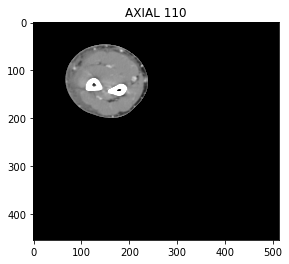

In [37]:
# TODO: YOUR CODE FOR AXIAL(vmin,vmax)
#110, 80,130

plt.imshow(data[:, :, imshape[2]//2]+ri, cmap='gray', vmin=vmin,vmax=vmax)
plt.gca().set_aspect(AXIAL)
plt.title("AXIAL 110")
plt.show()

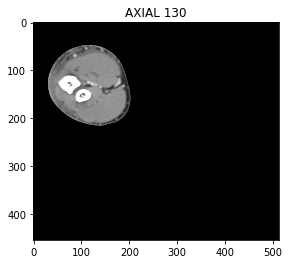

In [38]:
plt.imshow(data[:, :, 130]+ri, cmap='gray', vmin=vmin,vmax=vmax)
plt.gca().set_aspect(AXIAL)
plt.title("AXIAL 130")
plt.show()

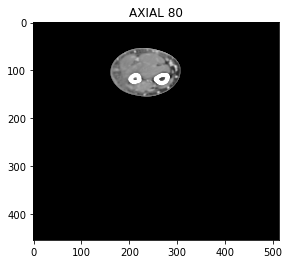

In [39]:
plt.imshow(data[:, :, 80]+ri, cmap='gray', vmin=vmin,vmax=vmax)
plt.gca().set_aspect(AXIAL)
plt.title("AXIAL 80")
plt.show()

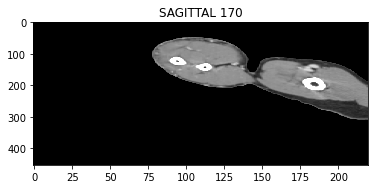

In [40]:
# TODO: YOUR CODE FOR SAGITTAL(vmin,vmax)
plt.imshow(data[:,imshape[1]//3,:]+ri, cmap='gray', vmin=vmin,vmax=vmax)
plt.gca().set_aspect(SAGITTAL)
plt.title("SAGITTAL 170")
plt.show()

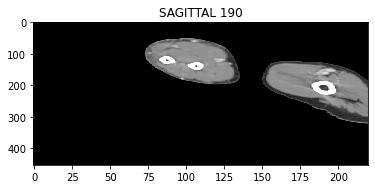

In [41]:
# TODO: YOUR CODE FOR SAGITTAL(vmin,vmax)
plt.imshow(data[:,190,:]+ri, cmap='gray', vmin=vmin,vmax=vmax)
plt.gca().set_aspect(SAGITTAL)
plt.title("SAGITTAL 190")
plt.show()

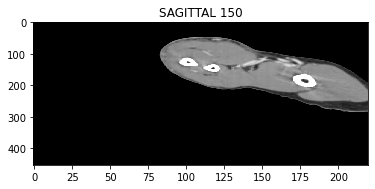

In [42]:
# TODO: YOUR CODE FOR SAGITTAL(vmin,vmax)
plt.imshow(data[:,150,:]+ri, cmap='gray', vmin=vmin,vmax=vmax)
plt.gca().set_aspect(SAGITTAL)
plt.title("SAGITTAL 150")
plt.show()

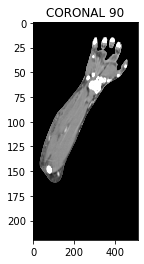

In [43]:
# TODO: YOUR CODE FOR CORONAL(vmin,vmax)
plt.imshow((data[imshape[0]//5,:,:] + ri).T, cmap='gray', vmin=vmin,vmax=vmax)
plt.gca().set_aspect(CORONAL)
plt.title("CORONAL 90")
plt.show()

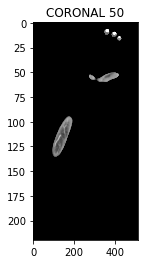

In [44]:
plt.imshow((data[50,:,:] + ri).T, cmap='gray', vmin=vmin,vmax=vmax)
plt.gca().set_aspect(CORONAL)
plt.title("CORONAL 50")
plt.show()

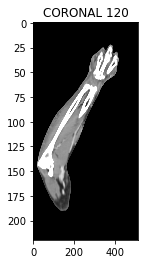

In [45]:
plt.imshow((data[120,:,:] + ri).T, cmap='gray', vmin=vmin,vmax=vmax)
plt.gca().set_aspect(CORONAL)
plt.title("CORONAL 120")
plt.show()

In [46]:
# 2) Play around with different Window/Level values that enhance
# the visualization.

In [47]:
# TODO: YOUR CODE
wc, ww = 50, 200
vmin = wc-ww//2
vmax = wc+ww//2

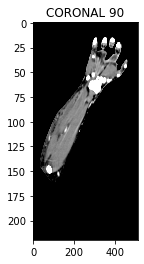

In [48]:
plt.imshow((data[imshape[0]//5,:,:] + ri).T, cmap='gray', vmin=vmin,vmax=vmax)
plt.gca().set_aspect(CORONAL)
plt.title("CORONAL 90")
plt.show()

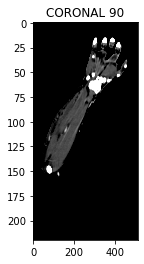

In [49]:
wc, ww = 100, 200
vmin = wc-ww//2
vmax = wc+ww//2
plt.imshow((data[imshape[0]//5,:,:] + ri).T, cmap='gray', vmin=vmin,vmax=vmax)
plt.gca().set_aspect(CORONAL)
plt.title("CORONAL 90")
plt.show()

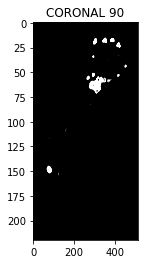

In [50]:
wc, ww = 200, 200
vmin = wc-ww//2
vmax = wc+ww//2
plt.imshow((data[imshape[0]//5,:,:] + ri).T, cmap='gray', vmin=vmin,vmax=vmax)
plt.gca().set_aspect(CORONAL)
plt.title("CORONAL 90")
plt.show()

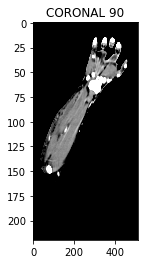

In [51]:
wc, ww = 50, 150
vmin = wc-ww//2
vmax = wc+ww//2
plt.imshow((data[imshape[0]//5,:,:] + ri).T, cmap='gray', vmin=vmin,vmax=vmax)
plt.gca().set_aspect(CORONAL)
plt.title("CORONAL 90")
plt.show()

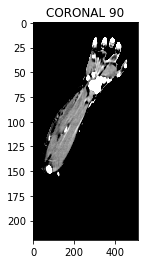

In [52]:
wc, ww = 50, 100
vmin = wc-ww//2
vmax = wc+ww//2
plt.imshow((data[imshape[0]//5,:,:] + ri).T, cmap='gray', vmin=vmin,vmax=vmax)
plt.gca().set_aspect(CORONAL)
plt.title("CORONAL 90")
plt.show()

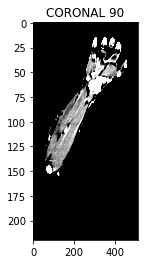

In [53]:
wc, ww = 50, 50
vmin = wc-ww//2
vmax = wc+ww//2
plt.imshow((data[imshape[0]//5,:,:] + ri).T, cmap='gray', vmin=vmin,vmax=vmax)
plt.gca().set_aspect(CORONAL)
plt.title("CORONAL 90")
plt.show()

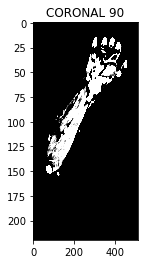

In [54]:
wc, ww = 50, 10
vmin = wc-ww//2
vmax = wc+ww//2
plt.imshow((data[imshape[0]//5,:,:] + ri).T, cmap='gray', vmin=vmin,vmax=vmax)
plt.gca().set_aspect(CORONAL)
plt.title("CORONAL 90")
plt.show()

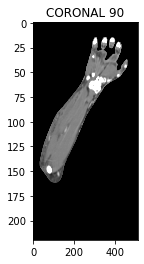

In [55]:
wc, ww = 50, 500
vmin = wc-ww//2
vmax = wc+ww//2
plt.imshow((data[imshape[0]//5,:,:] + ri).T, cmap='gray', vmin=vmin,vmax=vmax)
plt.gca().set_aspect(CORONAL)
plt.title("CORONAL 90")
plt.show()

#### Which values make sense and why?

TODO: YOUR ANSWER

Based on what type of tissue we want to test. The significantly wide window displaying all the CT numbers will result in different attenuations between soft tissues to become obscured. 

[Reference ： radiopaedia.org](https://radiopaedia.org/articles/windowing-ct?lang=us)

![p3](https://github.com/Yiming-S/cs480student/blob/main/05/3.png?raw=true)

**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [56]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

In [57]:
wc = file0.WindowCenter
ww = file0.WindowWidth
ri = file0.RescaleIntercept

In [58]:
vmin = wc-ww//2
vmax = wc+ww//2
print("vmin: {}\nvamx: {} ".format(vmin,vmax))

vmin: -175.0
vamx: 235.0 


In [132]:
# TODO: YOUR CODE TO SEGMENT FAT
new_mask  = data.copy()
new_mask  = new_mask .astype(np.int16)
new_mask[new_mask < -50] = 0
new_mask[new_mask > -300] = 0

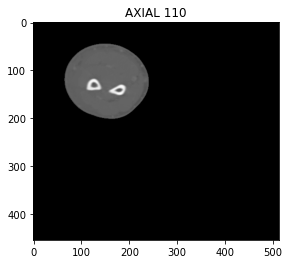

In [134]:
AXIAL = ps[1]/ps[0]
plt.imshow(data[:, :, 110], cmap='gray')#110
plt.gca().set_aspect(AXIAL)
plt.title("AXIAL 110")
plt.show()

In [114]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE
new_mask  = data.copy()
new_mask  = new_mask .astype(np.int16)
new_mask[new_mask < 50] = 0
new_mask[new_mask > 1500] = 0

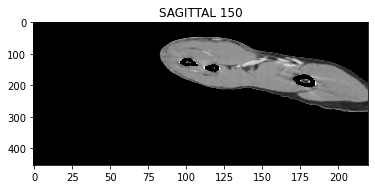

In [115]:
plt.imshow(new_mask[:,150,:]+ri, cmap='gray', vmin=vmin,vmax=vmax)
plt.gca().set_aspect(SAGITTAL)
plt.title("SAGITTAL 150")
plt.show()

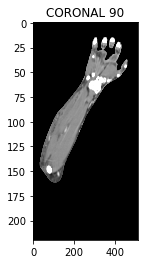

In [91]:
# TODO: YOUR CODE TO SEGMENT BONES
new_mask  = data.copy()
new_mask  = new_mask .astype(np.int16)
new_mask[new_mask < 700] = 0
new_mask[new_mask > 3400] = 0

plt.imshow((new_mask[imshape[0]//5,:,:] + ri).T, cmap='gray', vmin=vmin,vmax=vmax)
plt.gca().set_aspect(CORONAL)
plt.title("CORONAL 90")
plt.show()

In [ ]:
# Are the segmentations good?

In [ ]:
# TODO: YOUR ANSWER
# Yes, it works.

In [ ]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""